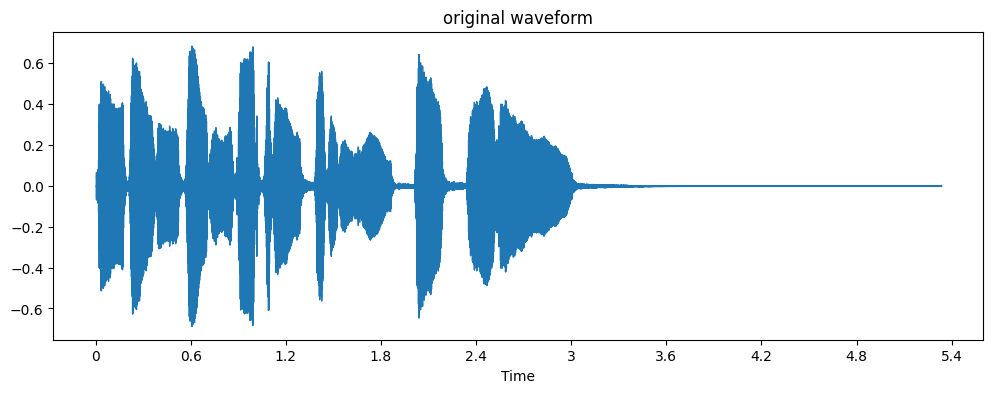

In [16]:
import librosa,librosa.display
import matplotlib.pyplot as plt
import numpy as np

#load audio file 
file=librosa.example('trumpet')
y,sr=librosa.load(file)

#plot original waveform

plt.figure(figsize=(12,4))
librosa.display.waveshow(y,sr=sr)
plt.title("original waveform")
plt.savefig("waveform.png")
plt.show()



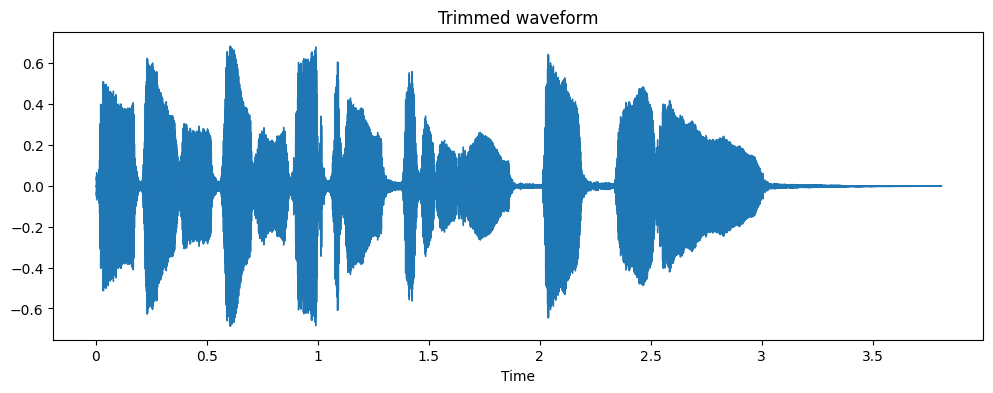

In [7]:
#trim silence

y_trim,_=librosa.effects.trim(y)
plt.figure(figsize=(12,4))
librosa.display.waveshow(y_trim,sr=sr)
plt.title("Trimmed waveform")
plt.savefig("Trimmed_waveform.jpg")
plt.show()


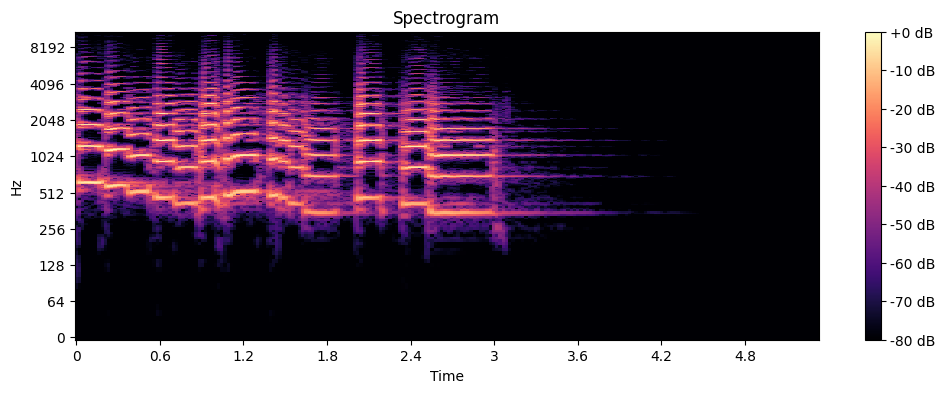

In [9]:
# spectrogram
D=np.abs(librosa.stft(y))
plt.figure(figsize=(12,4))
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),sr=sr,x_axis="time",y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.savefig("spectrogram.jpeg")
plt.show()

In [13]:
#feature extraction

tempo,_= librosa.beat.beat_track(y=y,sr=sr)
zcr=np.mean(librosa.feature.zero_crossing_rate(y))
mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)

print(f"tempo: {float(tempo):.2f} BPM")
print(f"zero crossing rate: {float(zcr):.4f}")
print("MFCC (first 5 coefficients):")
print(mfcc[:5, :5])





tempo: 184.57 BPM
zero crossing rate: 0.1735
MFCC (first 5 coefficients):
[[-276.79755   -239.10025   -272.0234    -326.28558   -364.18622  ]
 [  79.09506     51.800377    10.327837     3.4606361   18.075527 ]
 [-127.316284  -142.43262   -134.3639    -109.024216   -99.93298  ]
 [ -25.543613   -11.078817    -6.739852    -7.7403164  -15.143908 ]
 [ -36.300636   -46.885612   -47.927734   -39.063854   -34.897358 ]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14752\1527440468.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"tempo: {float(tempo):.2f} BPM")


In [14]:
with open("audio_features.txt",'w') as f:
    f.write(f"tempo: {float(tempo):.2f} BPM\n")
    f.write(f"zero crossing rate: {zcr:.4f}\n")
    f.write("MFCCs (first 5 coefficients):\n")
    f.write(str(mfcc[:5,:5]))
    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14752\3076708355.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f.write(f"tempo: {float(tempo):.2f} BPM\n")
